In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import openpyxl

# import data from xslx file
df = pd.read_excel('sensor poli AG D.xlsx', sheet_name='Hoja1')
# set header to first row
df.columns = df.iloc[0]
df = df.drop(df.index[0])

df.head()

,Frecuencia,Poli Ag D 0.1v2,Poli Ag D 0.08v2,Poli Ag D 0.04v2,Poli Ag D 0.02v2,Poli Ag D 0.01v2
1,300000,-12.89315,-12.0146,-5.97928,-3.03886,-1.55245
2,1700110,-13.61609,-12.65465,-6.30817,-3.30696,-1.85888
3,3100220,-13.77256,-12.7448,-6.37285,-3.3744,-1.91953
4,4500330,-13.74865,-12.77049,-6.38177,-3.37529,-1.9651
5,5900440,-13.78471,-12.76089,-6.40277,-3.403,-1.98613


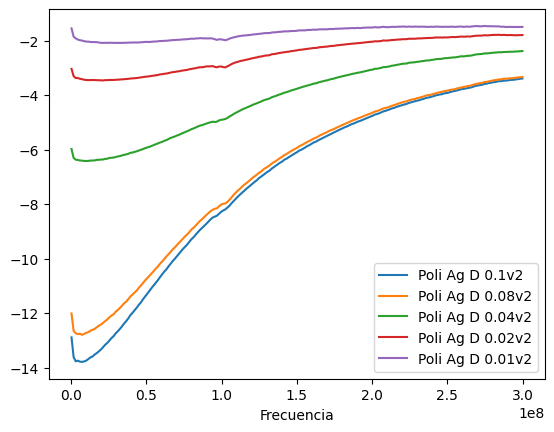

In [21]:
# multiple x values

x = df[['Poli Ag D 0.1v2', 'Poli Ag D 0.08v2', 'Poli Ag D 0.04v2', 'Poli Ag D 0.02v2', 'Poli Ag D 0.01v2']]
df2 = df.iloc[:, 1:]
y = df['Frecuencia']

plt.plot(y, df2)
plt.legend(df2.columns)
plt.xlabel('Frecuencia')
plt.show()

In [33]:
# cuadratic regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


# plot
plt.scatter(y, df2)
plt.plot(y, pol_reg.predict(poly_reg.fit_transform(x)), color='red')


LinearRegression()